In [24]:
from IPython.display import IFrame
IFrame("./pdf/tp2ej7rev2.pdf", width=1000, height=500)

# a.1): Transferencia del prototipo normalizado

<IPython.core.display.Math object>

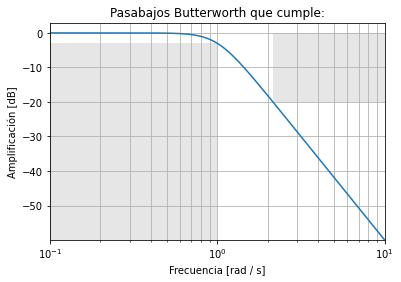

In [2]:
import numpy as np
import scipy.signal as signal
import splane as tc2
import matplotlib.pyplot as plt

ws = 2.1645
wc = 1
a_ws = 20
a_wc = 3


N, Wn = signal.buttord(wc, ws, a_wc, a_ws, True)
num,den = signal.butter(N, Wn, 'low', True)

# particiono en 2 SOS's para la implementación
sos_pa = tc2.tf2sos_analog(num,den)

tc2.pretty_print_SOS(sos_pa)

w, h = signal.freqs(num,den)
h_db = 20 * np.log10(abs(h))
plt.semilogx(w,h_db)
plt.title('Pasabajos Butterworth que cumple:')
plt.xlabel('Frecuencia [rad / s]')
plt.ylabel('Amplificación [dB]')
plt.grid(which='both', axis='both')
plt.fill([w.min(), w.min(),  wc,  wc], [h_db.min(), -a_wc, -a_wc, h_db.min()], '0.9', lw=0) # pass
plt.fill([ws,ws, w.max(), w.max()], [h_db.max(), -a_ws, -a_ws, h_db.max()], '0.9', lw=0) # stop
plt.axis([w.min(),w.max(), h_db.min(), h_db.max()+3])
plt.show()


# a.2): Transferencia del filtro normalizado

<IPython.core.display.Math object>

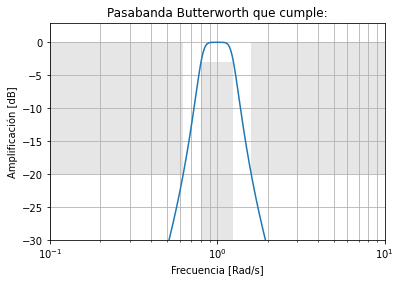

In [10]:
import scipy.signal as signal

w0 = 1
q = 2.22

f0  = 1
fc1 = 0.8
fc2 = 1.25 
fs1 = 0.625 
fs2 = 1.6 

a_fc = 3
a_fs = 20

num_bp, den_bp = signal.lp2bp(num, den,wo =w0 , bw = w0/q)

# particiono en 2 SOS's para la implementación
sos_pa = tc2.tf2sos_analog(num_bp, den_bp)

### la visualizamos de algunas formas, la tradicional
tc2.pretty_print_SOS(sos_pa)
w, h = signal.freqs(num_bp, den_bp,worN=np.logspace(-1, 1, 1000))
h_db = 20 * np.log10(abs(h))
plt.semilogx(w,h_db)
plt.title('Pasabanda Butterworth que cumple:')
plt.xlabel('Frecuencia [Rad/s]')
plt.ylabel('Amplificación [dB]')
plt.grid(which='both', axis='both')

plt.axis([w.min(),w.max(), h_db.max()-30, h_db.max()+3])

plt.fill([0 ,  0,  fs1,   fs1],[h_db.max(), -a_fs, -a_fs, h_db.max()], '0.9', lw=0) # stop
plt.fill([fc1, fc1,  fc2,  fc2], [h_db.min(), -a_fc, -a_fc, h_db.min()], '0.9', lw=0) # pass
plt.fill([fs2,fs2, w.max(), w.max()], [h_db.max(), -a_fs, -a_fs, h_db.max()], '0.9', lw=0) # stop

plt.show()
#tc2.analyze_sys(sos_pa)

# b) Diagrama de polos y ceros:

(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

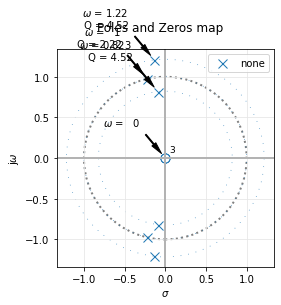

In [19]:
sos = tc2.sos2tf_analog(tc2.tf2sos_analog(num_bp, den_bp))
tc2.pzmap(sos,annotations = True)

## C)
Graficar la transferencia (módulo y fase) del filtro pedido




------------------
Particiono en SOSs
------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

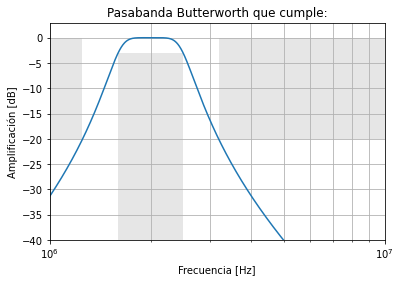

In [8]:
import math

f0  = 2000E3
fc1 = 1600E3
fc2 = 2500E3 
fs1 = 1250E3 
fs2 = 3200E3 

a_fc = 3
a_fs = 20

w0 = f0 * 2*math.pi
q = 2.22

num_bp, den_bp = signal.lp2bp(num, den,wo =w0 , bw = w0/q)

print('\n\n')
print('------------------')
print('Particiono en SOSs')
print('------------------')

tc2.pretty_print_lti(num_bp, den_bp)

# particiono en 2 SOS's para la implementación
sos_pa = tc2.tf2sos_analog(num_bp, den_bp)

### la visualizamos de algunas formas, la tradicional
tc2.pretty_print_SOS(sos_pa)

w, h = signal.freqs(num_bp, den_bp,worN=np.logspace(6, 7, 1000)*(2*math.pi))
f = w/(2*math.pi)
h_db = 20 * np.log10(abs(h))
plt.semilogx(f,h_db)
plt.title('Pasabanda Butterworth que cumple:')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplificación [dB]')
plt.grid(which='both', axis='both')

plt.axis([f.min(),f.max(), h_db.max()-40, h_db.max()+3])

plt.fill([0 ,  0,  fs1,   fs1],[h_db.max(), -a_ws, -a_ws, h_db.max()], '0.9', lw=0) # stop
plt.fill([fc1, fc1,  fc2,  fc2], [h_db.min(), -a_fc, -a_fc, h_db.min()], '0.9', lw=0) # pass
plt.fill([fs2,fs2, w.max(), w.max()], [h_db.max(), -a_ws, -a_ws, h_db.max()], '0.9', lw=0) # stop

plt.show()

# Circuitos y simulaciónes:

Advertencia: Para las simulaciones circuitales se tomó f0 = 2KHz debido a las alinealidades de los operacionales a 2000KHz.

In [20]:
from IPython.display import IFrame
IFrame("./img/Circuitos.jpg", width=1000, height=500)

In [21]:
from IPython.display import IFrame
IFrame("./img/Circuitos_Grafico.jpg", width=1000, height=500)